# Daily Challenge: Data Cleaning and Transformation with Real-World Datasets

## Your Task

Your challenge involves working with the “Global Terrorism Database” from the National Consortium for the Study of Terrorism and Responses to Terrorism (START). This dataset is a rich source of information on terrorist activities worldwide.

Dataset Link: [Global Terrorism Database](https://github.com/devtlv/Datasets-DA-Bootcamp-2-/raw/refs/heads/main/Week%207%20-%20Analysing%20Web%20Data/W7D3%20-%20Mini%20project/Global%20Terrorism%20Database.zip)

---

## 1. Data Cleaning:

- Initial Assessment: Load the dataset and conduct a preliminary assessment to understand its structure and content.
- Handling Inconsistencies: Identify and address missing values, incorrect data types, and data inconsistencies.


## 2. Data Transformation:

- Categorical Transformation: Convert categorical data into a format suitable for analysis, such as one-hot encoding.
- Numerical Normalization: Normalize or standardize numerical features as required.


## 3. Exploratory Data Analysis:

- Data Exploration: Conduct exploratory data analysis on the cleaned and integrated dataset.
- Visualization: Create visualizations to reveal patterns and insights related to terrorism events in their socio-economic context.




---
## About the dataset:

The Global Terrorism Database (GTD) provides a comprehensive collection of data regarding terrorist incidents worldwide from 1970 to 2017. Below are the key columns typically included in the dataset, formatted for easy copying into a markdown cell:

| Column Name               | Description                                                                                     |
|---------------------------|-------------------------------------------------------------------------------------------------|
| eventid                   | Unique identifier for each terrorist event                                                    |
| iyear                     | Year of the incident                                                                            |
| imonth                    | Month of the incident                                                                           |
| iday                      | Day of the incident                                                                             |
| approxdate                | Approximate date of the incident (if exact date is unknown)                                   |
| extended                  | Indicates if the date is extended due to lack of specificity                                   |
| country                   | Country where the incident occurred                                                             |
| country_txt               | Name of the country where the incident occurred                                                |
| region                    | Region where the incident occurred                                                              |
| region_txt                | Name of the region where the incident occurred                                                 |
| locality                  | Locality or specific location of the incident                                                  |
| locality_txt              | Text description of the locality                                                                |
| attacktypeid              | Identifier for the type of attack                                                               |
| attacktype_txt            | Description of the type of attack                                                               |
| targettypeid              | Identifier for the type of target                                                                |
| targettype_txt            | Description of the type of target                                                                |
| targsubtypeid             | Identifier for the subtype of target                                                             |
| targsubtype_txt           | Description of the subtype of target                                                             |
| natlty1id                 | Nationality identifier for primary target                                                        |
| natlty1_txt               | Nationality description for primary target                                                       |
| natlty2id                 | Nationality identifier for secondary target                                                      |
| natlty2_txt               | Nationality description for secondary target                                                    |
| gname                     | Name of the group responsible for the attack                                                    |
| gname2                    | Name of a second group responsible (if applicable)                                             |
| motive                    | Motive behind the attack                                                                         |
| weaptypeid                | Identifier for the type of weapon used                                                           |
| weaptype_txt              | Description of weapon type                                                                        |
| nkill                     | Number of people killed                                                                          |
| nkillus                   | Number of U.S. citizens killed                                                                    |
| nwound                    | Number wounded                                                                                   |
| property                  | Indicates if property was damaged or destroyed                                                   |

---

## 1. Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# # extract the zip
# path = '/content/zip.zip'
# !unzip -q $path

# get the file as df
df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin1')

<ipython-input-2-04368cde5fcb>:6: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding='latin1')


In [3]:
# remove columns limit displaying dataframes
pd.set_option('display.max_columns', None)

display(df.head())

print(f'## it i a hughe dataset: {df.shape}')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

## it i a hughe dataset: (181691, 135)


In [4]:
# we check for duplicates
print(f'## duplicates: {df.duplicated().sum()}')

## duplicates: 0


## missing values:
eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64


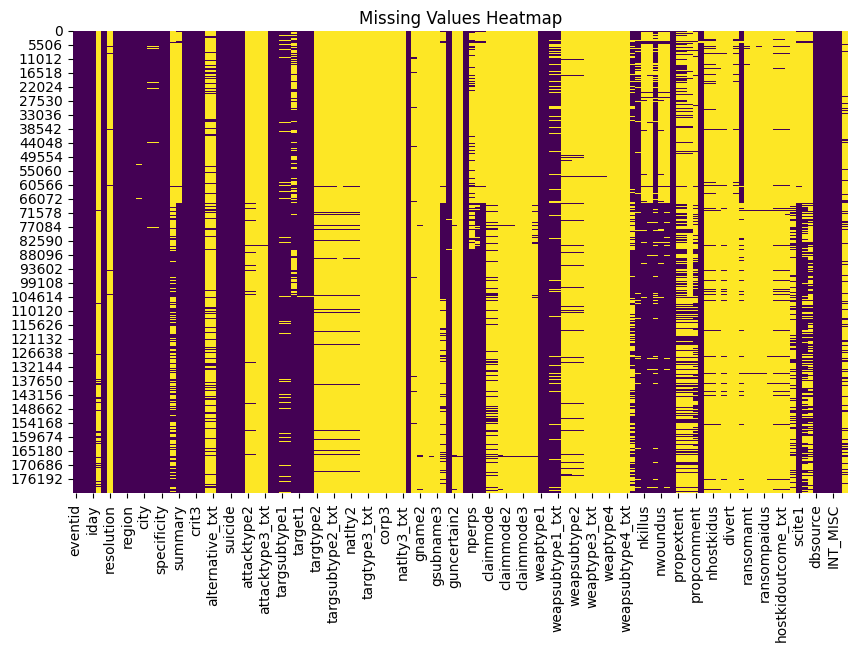

In [5]:
# count missing values
print('## missing values:')
print(df.isnull().sum())

# missing values heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

We see many of the columns are mainly empty. Also many of its columns are not central for our current analysis. Let us first focus on our columns of interest:

In [6]:
cols_to_focus = ['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 'attacktype1_txt',
                 'targtype1_txt', 'nkill', 'nwound', 'weaptype1_txt', 'gname']

# focus in a much smaller number of columns
df_focus = df[cols_to_focus].copy()

# rename cols for better legibility
df_focus.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'country_txt': 'country', 'region_txt': 'region',
                         'city': 'city', 'latitude': 'latitude', 'longitude': 'longitude', 'attacktype1_txt': 'attack_type',
                         'targtype1_txt': 'target_type', 'nkill': 'n_killed', 'nwound': 'n_wounded', 'weaptype1_txt': 'weapon_type',
                         'gname': 'terror group'},
                inplace=True)

display(df_focus.head())

# count missing values
print('\n## missing values:')
print(df_focus.isnull().sum())

,eventid,year,month,day,country,region,city,latitude,longitude,attack_type,target_type,n_killed,n_wounded,weapon_type,terror group
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Private Citizens & Property,1.0,0.0,Unknown,MANO-D
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,Unknown,23rd of September Communist League
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Journalists & Media,1.0,0.0,Unknown,Unknown
3,197001000002,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Explosives,Unknown
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Incendiary,Unknown



## missing values:
eventid             0
year                0
month               0
day                 0
country             0
region              0
city              435
latitude         4556
longitude        4557
attack_type         0
target_type         0
n_killed        10313
n_wounded       16311
weapon_type         0
terror group        0
dtype: int64


That is a much more readable dataframe. Now we can make some inputation:

In [7]:
df_focus = df_focus.copy() # aaaaaaaaaaaaaaa

# unnkowns
df_focus['city'] = df_focus['city'].fillna('Unknown')
df_focus['region'] = df_focus['region'].fillna('Unknown')

# lat and long are not much so lets drop em
df_focus = df_focus.dropna(subset=['latitude', 'longitude'])

# lets asume if no killed or wounded are registered, then its 0
df_focus['n_killed'] = df_focus['n_killed'].fillna(0)
df_focus['n_wounded'] = df_focus['n_wounded'].fillna(0)

# count  missing values
print('\n## missing values:')
print(df_focus.isnull().sum())

print(f'\n## we started with a total of {len(df)} rows, and now we have {len(df_focus)} rows.')


## missing values:
eventid         0
year            0
month           0
day             0
country         0
region          0
city            0
latitude        0
longitude       0
attack_type     0
target_type     0
n_killed        0
n_wounded       0
weapon_type     0
terror group    0
dtype: int64

## we started with a total of 181691 rows, and now we have 177134 rows.


In [8]:
# now we check the basic info and stats
print(df_focus.info())
print('\n')
display(df_focus.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
Index: 177134 entries, 0 to 181690
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   eventid       177134 non-null  int64  
 1   year          177134 non-null  int64  
 2   month         177134 non-null  int64  
 3   day           177134 non-null  int64  
 4   country       177134 non-null  object 
 5   region        177134 non-null  object 
 6   city          177134 non-null  object 
 7   latitude      177134 non-null  float64
 8   longitude     177134 non-null  float64
 9   attack_type   177134 non-null  object 
 10  target_type   177134 non-null  object 
 11  n_killed      177134 non-null  float64
 12  n_wounded     177134 non-null  float64
 13  weapon_type   177134 non-null  object 
 14  terror group  177134 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 21.6+ MB
None




,eventid,year,month,day,country,region,city,latitude,longitude,attack_type,target_type,n_killed,n_wounded,weapon_type,terror group
count,1.771340e+05,177134.000000,177134.000000,177134.000000,177134,177134,177134,177134.000000,1.771340e+05,177134,177134,177134.000000,177134.000000,177134,177134
unique,NaN,NaN,NaN,NaN,204,12,35058,NaN,NaN,9,22,NaN,NaN,12,3463
top,NaN,NaN,NaN,NaN,Iraq,Middle East & North Africa,Unknown,NaN,NaN,Bombing/Explosion,Private Citizens & Property,NaN,NaN,Explosives,Unknown
freq,NaN,NaN,NaN,NaN,24487,49577,7961,NaN,NaN,86843,42568,NaN,NaN,91006,81485
mean,2.002979e+11,2002.913150,6.468668,15.517975,NaN,NaN,NaN,23.498444,-4.586957e+02,NaN,NaN,2.231215,2.912614,NaN,NaN
std,1.321102e+09,13.210935,3.388221,8.808546,NaN,NaN,NaN,18.569247,2.047790e+05,NaN,NaN,11.171577,34.724034,NaN,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,NaN,NaN,-53.154613,-8.618590e+07,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.991061e+11,1991.000000,4.000000,8.000000,NaN,NaN,NaN,11.510545,4.545640e+00,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,2.009070e+11,2009.000000,6.000000,15.000000,NaN,NaN,NaN,31.467463,4.324651e+01,NaN,NaN,0.000000,0.000000,NaN,NaN
75%,2.014083e+11,2014.000000,9.000000,23.000000,NaN,NaN,NaN,34.685087,6.871033e+01,NaN,NaN,2.000000,2.000000,NaN,NaN


All our focused columns seem to be on the correct data type. Most of the attacks were in iraq, the most common attack was bombing/explosion, the favorite target is private citizens and property, the max amount of killed people was 1570 (surelly outlier), and most wounded were 8190 (surelly outlier).

Now we check for correlations:

In [9]:
# this cell eats all the RAM

# # apply onehotencode on the dataframe
# df_focus_encoded = pd.get_dummies(df_focus, columns=['country', 'region', 'city', 'attack_type', 'target_type', 'weapon_type', 'terror group'])

# # encoded heatmap
# plt.figure(figsize=(10, 10))
# sns.heatmap(df_focus_encoded.corr(), annot=True, cmap='coolwarm')

## 2.EDA

### 2.1. Detailed Data

Details of the attack with more death people:

In [10]:
# attack with more killed
attack_killed = max(df_focus['n_killed'])
attack_id = df_focus[df_focus['n_killed'] == attack_killed].index[0]
attack_row = df.iloc[attack_id]

print('## attack with more killed details:')
print(f'year: {attack_row["iyear"]}')
print(f'month: {attack_row["imonth"]}')
print(f'day: {attack_row["iday"]}')
print(f'country: {attack_row["country_txt"]}')
print(f'region: {attack_row["region_txt"]}')
print(f'city: {attack_row["city"]}')
print(f'latitude: {attack_row["latitude"]}')
print(f'longitude: {attack_row["longitude"]}')
print(f'attack type: {attack_row["attacktype1_txt"]}')
print(f'target type: {attack_row["targtype1_txt"]}')
print(f'n_killed: {attack_row["nkill"]}')
print(f'n_wounded: {attack_row["nwound"]}')
print(f'weapon type: {attack_row["weaptype1_txt"]}')
print(f'terror group: {attack_row["gname"]}')

## attack with more killed details:
year: 2014
month: 6
day: 12
country: Iraq
region: Middle East & North Africa
city: Tikrit
latitude: 34.621521
longitude: 43.668377
attack type: Hostage Taking (Kidnapping)
target type: Military
n_killed: 1570.0
n_wounded: nan
weapon type: Firearms
terror group: Islamic State of Iraq and the Levant (ISIL)


Top ten countries by terrorist attack number:

## top ten countries by terrorist attack number:


,attack_count,n_killed,n_wounded
country,,,
Iraq,24487,78175.0,134235.0
Pakistan,14318,23679.0,41848.0
Afghanistan,12639,39247.0,44224.0
India,11801,18663.0,28585.0
Colombia,7835,13514.0,10106.0
Philippines,6528,7969.0,12191.0
Peru,5808,11306.0,3875.0
United Kingdom,5227,3410.0,6105.0
El Salvador,4846,11322.0,4681.0


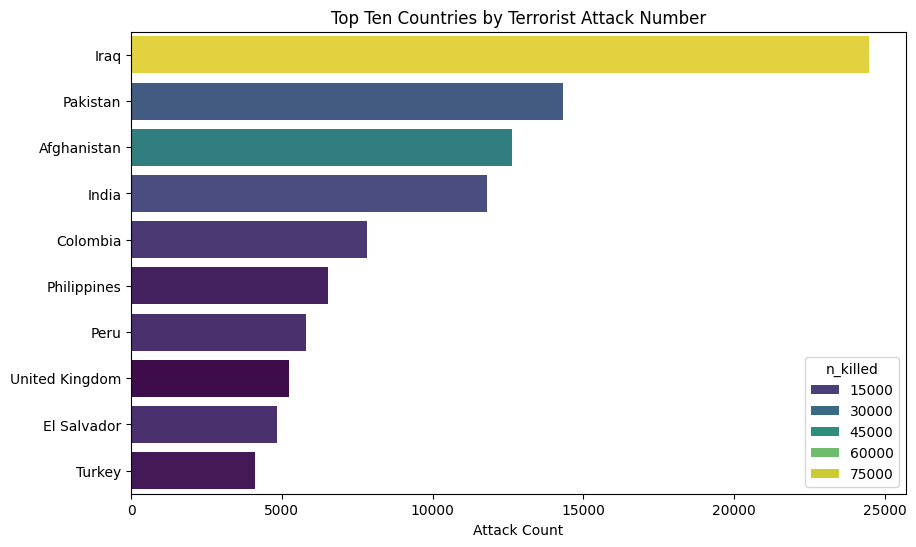

In [11]:
# get the data
print('## top ten countries by terrorist attack number:')
countries_stats = df_focus.groupby('country').agg(
    attack_count=('country', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False).head(10)

display(countries_stats)

# print it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=countries_stats.index, data=countries_stats, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Top Ten Countries by Terrorist Attack Number')
plt.show()

In the barplot we see again how Iraq is by far the country with more attacks -and deaths. The only first world country that is in the top ten is UK, with more attacks than El Salvador and Turkey.

A similar plot we do for the regions:

## top ten regions by terrorist attack number:


,attack_count,n_killed,n_wounded
region,,,
Middle East & North Africa,49577,134942.0,212547.0
South Asia,44479,99647.0,139579.0
South America,18110,26179.0,16231.0
Sub-Saharan Africa,17011,74970.0,51520.0
Western Europe,16482,6673.0,18241.0
Southeast Asia,11946,13689.0,24677.0
Central America & Caribbean,9344,24635.0,8183.0
Eastern Europe,5117,7370.0,12030.0
North America,3450,4916.0,21531.0


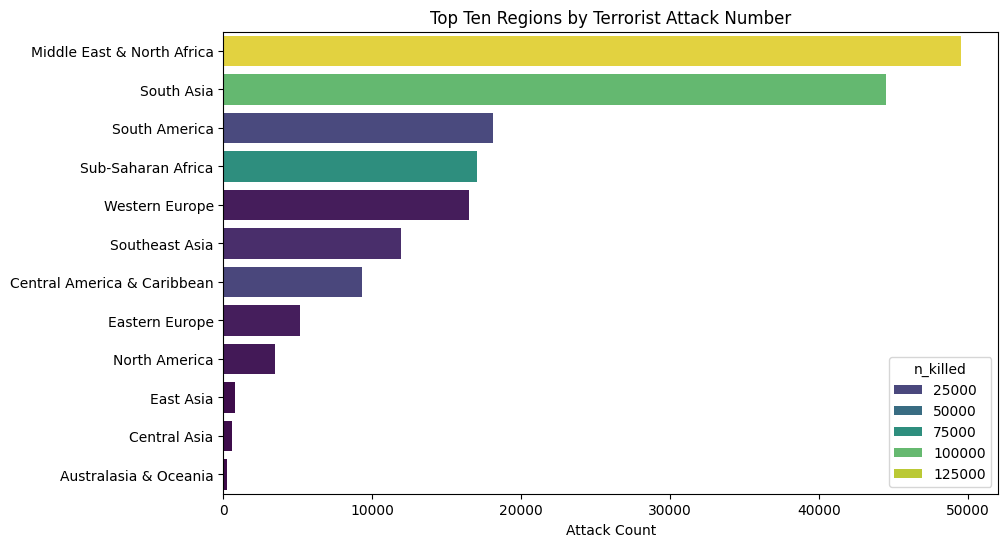

In [12]:
# get the data
print('## top ten regions by terrorist attack number:')
regions_stats = df_focus.groupby('region').agg(
    attack_count=('country', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False)

display(regions_stats)

# print it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=regions_stats.index, data=regions_stats, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Top Ten Regions by Terrorist Attack Number')
plt.show()

We can observe that Middle East & North Africa next to South Asia are by far ahead on the amount of attacks and deaths. They both are a magnitude order above and have more attacks than the other combined regions in the top ten. East Asia, Central Asia, and Oceania are the regions with (by far) less attacks.

Anual data:


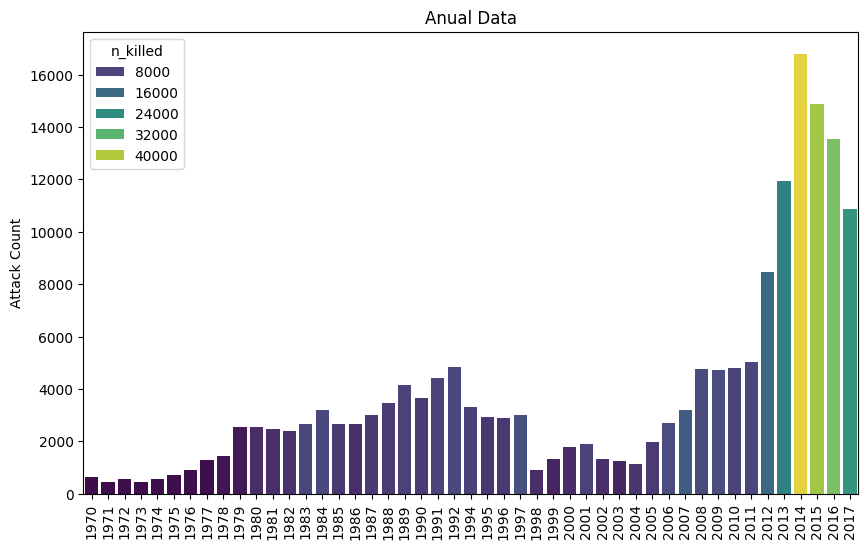


## year with more attacks:
      attack_count  n_killed    group
year                                 
2014         16794   44284.0  Unknown


In [13]:
# get anual stats
year_stats = df_focus.groupby('year').agg(
    attack_count=('year', 'count'),
    n_killed=('n_killed', 'sum'),
    group=('terror group', lambda x: x.mode()[0] if not x.mode().empty else None)
).sort_values(by='year')

# plot it
plt.figure(figsize=(10, 6))
sns.barplot(x=year_stats.index, y='attack_count', data=year_stats, palette='viridis', hue='n_killed')

# title & labels
plt.xlabel('')
plt.ylabel('Attack Count')
plt.title('Anual Data')
plt.xticks(rotation=90)
plt.show()

print('\n## year with more attacks:')
print(year_stats[year_stats['attack_count'] == year_stats['attack_count'].max()])

The amount of terrorist attacks spiked exponentially for ten years since 2004. The peak is reached in 2014 with ~17000 attacks and ~44000 deaths; after that there is an abrut descent until 2017 -where the dataset ends.

The most active terror groups are:

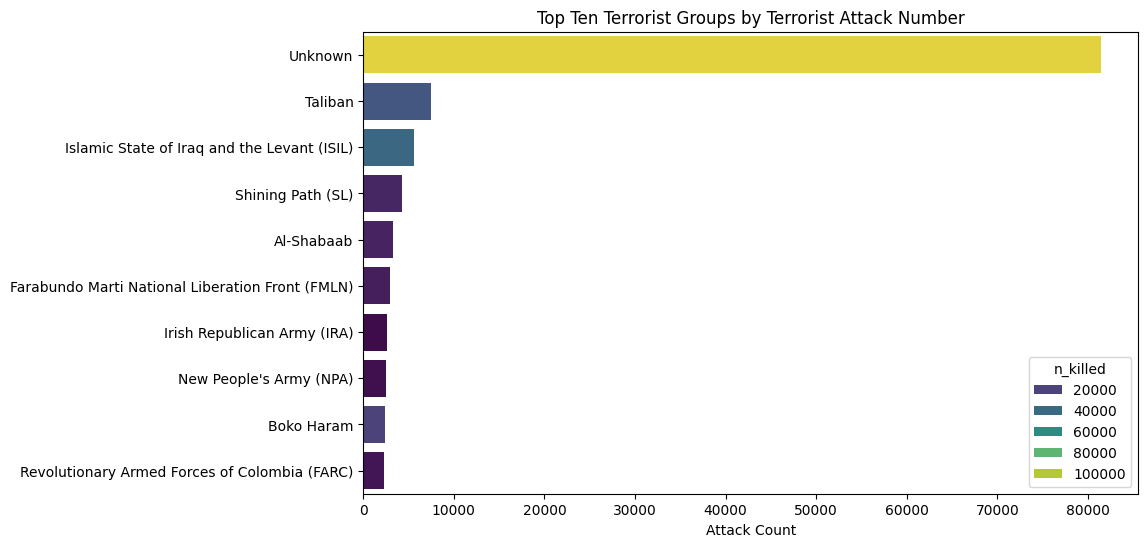

In [21]:
# group by terror group
group_stats = df_focus.groupby('terror group').agg(
    attack_count=('terror group', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False).head(10)

# print it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=group_stats.index, data=group_stats, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Top Ten Terrorist Groups by Terrorist Attack Number')
plt.show()

Most attacks were performed by unidentified terror groups, after that we have Taliban (Middle East), ISIL (Middle East) and Shining Path (Latin America).

Details on preffered weapon

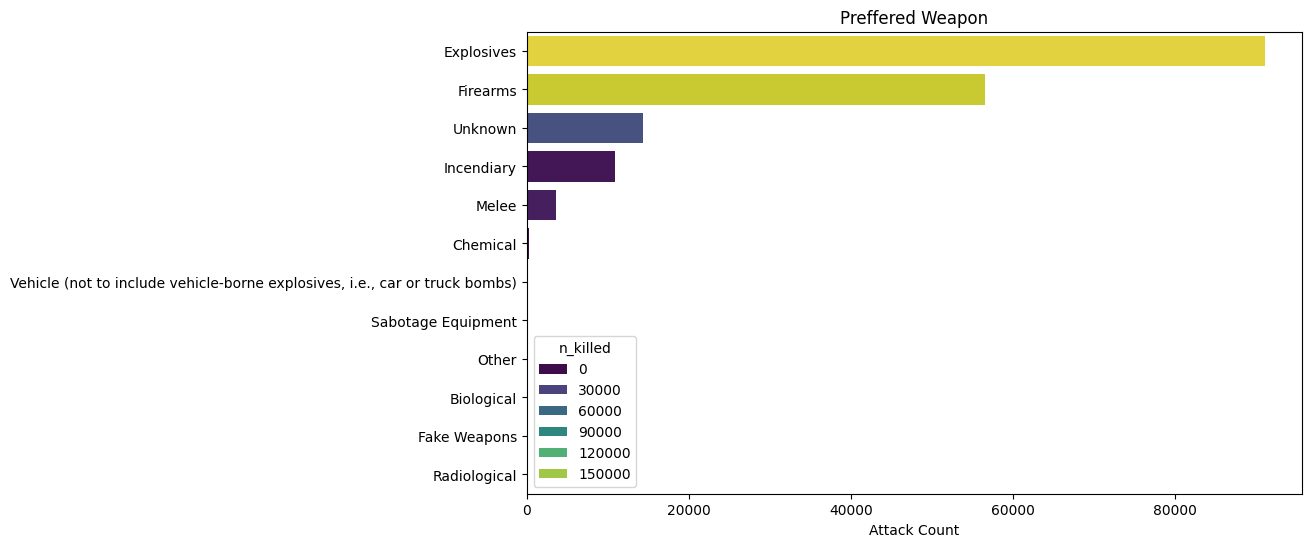

In [14]:
# get data by weapon
weapon_stats = df_focus.groupby('weapon_type').agg(
    attack_count=('weapon_type', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False)

# print it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=weapon_stats.index, data=weapon_stats, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Preffered Weapon')
plt.show()

The preffer weapon in the terrorists attacks are the explosives and firearms. Explosives alone is about all the rest combined.

Details on the attack type:

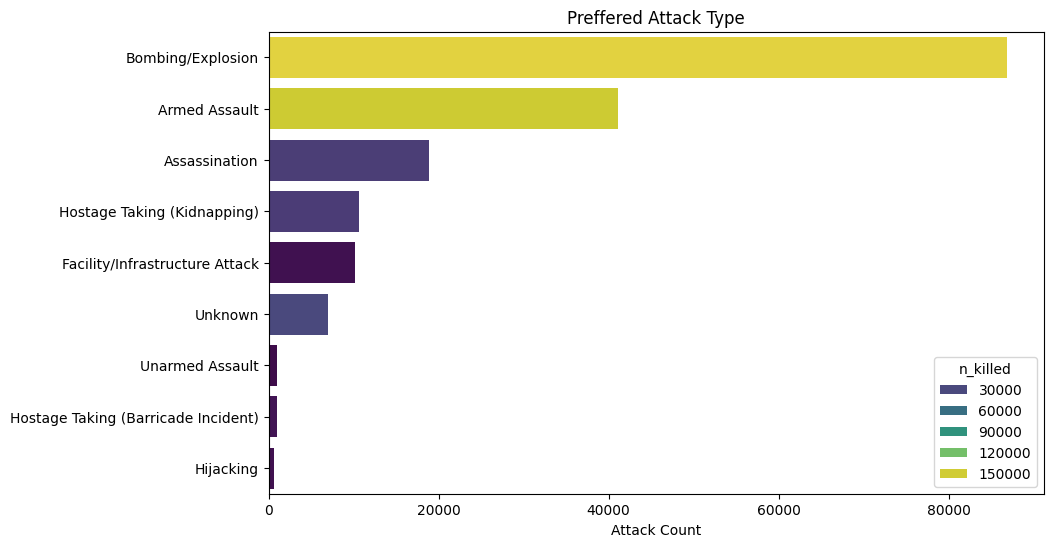

In [15]:
# get data by attack type
type_count = df_focus.groupby('attack_type').agg(
    attack_count=('weapon_type', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False)

# plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=type_count.index, data=type_count, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Preffered Attack Type')
plt.show()

The preffer attack type is bombing, and has more attacks than the other combined types.

Finally, target type details:

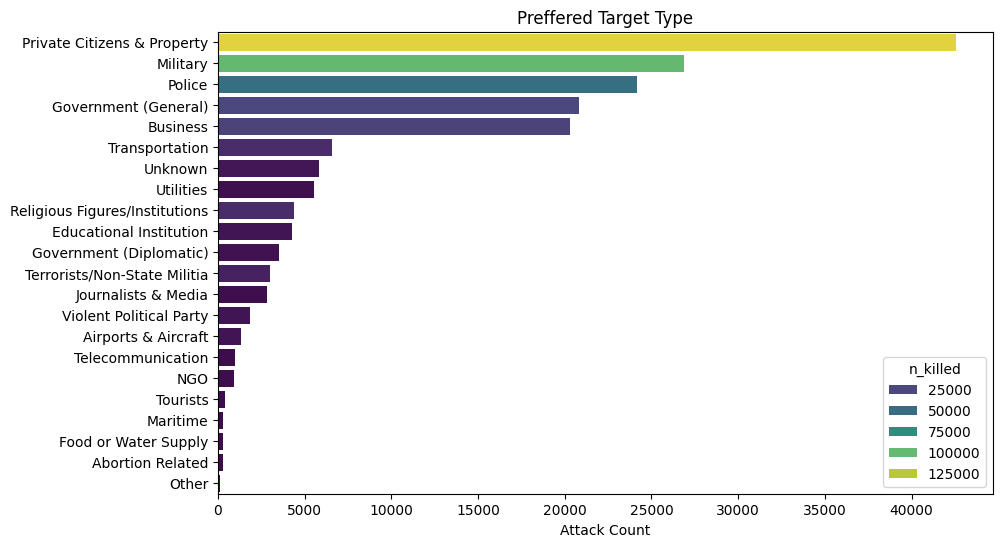

In [16]:
# get data by target type
target_stats = df_focus.groupby('target_type').agg(
    attack_count=('target_type', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).sort_values(by='attack_count', ascending=False)

# plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='attack_count', y=target_stats.index, data=target_stats, palette='viridis', hue='n_killed')
plt.xlabel('Attack Count')
plt.ylabel('') # redundat
plt.title('Preffered Target Type')
plt.show()

Private citizens & property are the preffered target, after that are military and police (two thirds of p. citizens), and government and business (half a way from p. citizens)

## 2.2. General vizualizations

For qualitative data we have the world map with the details:

In [19]:
# get country stats globally
country_stats_world = df_focus.groupby('country').agg(
    attack_count=('country', 'count'),
    n_killed=('n_killed', 'sum'),
    n_wounded=('n_wounded', 'sum'),
).reset_index()


# release the kraken
fig = px.choropleth(country_stats_world,
                    locations=country_stats_world['country'],
                    locationmode='country names',
                    color='n_killed', # Replace with the column you want to visualize
                    hover_name='country',
                    hover_data=['attack_count', 'n_killed', 'n_wounded'], # Add other columns for hover info
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Terrorist Attacks by Country')

# personalize plot
fig.update_layout(
    title_x=0.5,  # Center the title
    # title_y=0,
    title_font=dict(size=24), # bigger font
    margin={"r":0,"t":50,"l":0,"b":10}, # margins
    # height=600  # height in pixels
)

fig.show()

---

## Conclusions

 - Iraq is by far the country with more attacks -and deaths. The only first world country that is in the top ten countries with more terrorist attacks is UK, with more attacks than El Salvador and Turkey.

 - Middle East & North Africa next to South Asia are by far ahead on the amount of attacks and deaths. They both are a magnitude order above and have more attacks than the other combined regions in the top ten. East Asia, Central Asia, and Oceania are the regions with (by far) less attacks.

 - The amount of terrorist attacks spiked exponentially for ten years since 2004. The peak is reached in 2014 with ~17000 attacks and ~44000 deaths; after that there is an abrut descent until 2017 -where the dataset ends.

 - Most attacks were performed by unidentified terror groups, after that we have Taliban (Middle East), ISIL (Middle East) and Shining Path (Latin America).

 - The preffer weapon in the terrorists attacks are the explosives and firearms. Explosives alone is about all the rest combined.

 - The preffer attack type is bombing, and has more attacks than the other combined types.

 - Private citizens & property are the preffered target, after that are military and police (two thirds of p. citizens), and government and business (half a way from p. citizens)

 - An interactive world map was ploted with hovering details.

---

## Future Steps

There is room for improvement:

- This dataset is extensive and only a small fraction of its data was analyzed.

- With more time on hands, more analysis could be done.